In [1]:
import pandas as pd
import statistics as sts
import seaborn as srn
print("Importações ok.")

Importações ok.


In [4]:
dataset = pd.read_csv('./dados/tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [7]:
dataset.shape

(14, 5)

In [16]:
#Visualizando dados referente a Aparencia
agrupado1 = dataset.groupby(['Aparencia']).size()
agrupado1

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

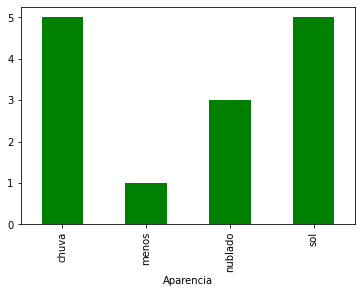

In [17]:
agrupado1.plot.bar(color = 'green')

In [18]:
#Visualizando dados referente a Temperatura
agrupado2 = dataset.groupby(['Temperatura']).size()
agrupado2

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

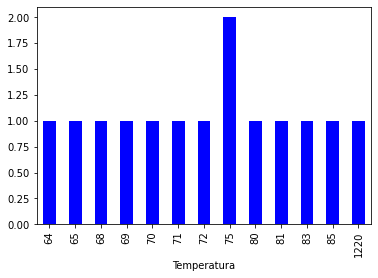

In [20]:
agrupado2.plot.bar(color = 'blue')

In [21]:
#Visualizando dados referente a Umidade
agrupado3 = dataset.groupby(['Umidade']).size()
agrupado3

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<AxesSubplot:xlabel='Umidade'>

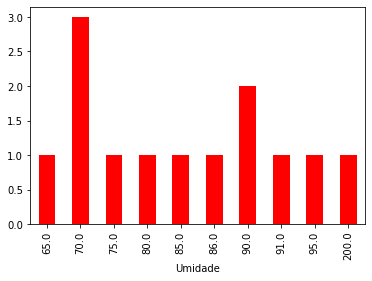

In [22]:
agrupado3.plot.bar(color = 'red')

In [23]:
#Visualizando dados referente ao 'jogar'
agrupado4 = dataset.groupby(['Jogar']).size()
agrupado4

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

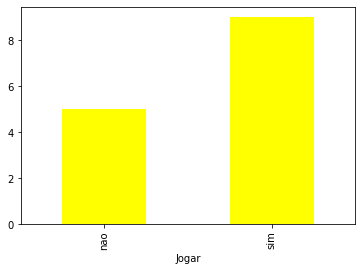

In [25]:
agrupado4.plot.bar(color = 'yellow')

In [28]:
#Explorando colunas numéricas
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [29]:
#Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

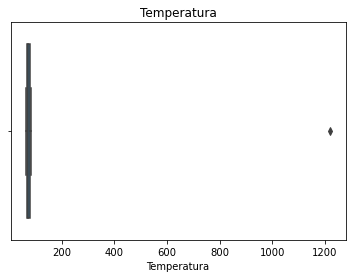

In [31]:
#Gráfico
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

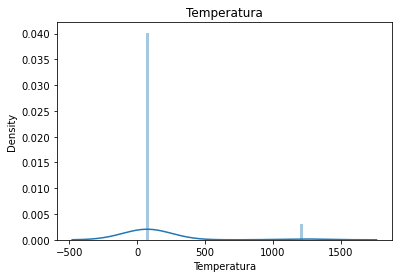

In [33]:
#Grafico
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [34]:
#HUMIDADE
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

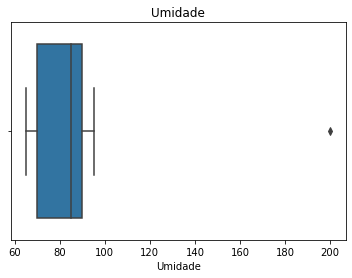

In [37]:
#Grafico
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

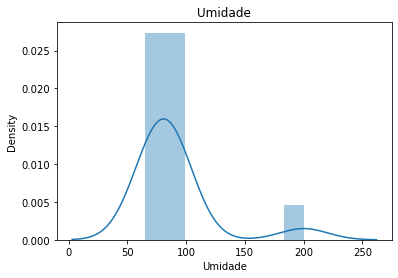

In [39]:
#Grafico
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [41]:
#Contando valores nulos
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [44]:
#Mediana Umidade
madianaUmi = sts.median(dataset['Umidade'])
madianaUmi

85.5

In [47]:
#Substituir NaN por mediana
dataset['Umidade'].fillna(madianaUmi, inplace=True)

In [49]:
#Verificando se há valores nulos
dataset['Umidade'].isnull().sum()

0

In [61]:
#Prenchendo valores nulos
dataset['Vento'].fillna('FALSO', inplace=True)

In [63]:
#Verificando se há valores nulos
dataset['Vento'].isnull().sum()

0

In [65]:
#Substituindo
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] = madianaUmi

In [66]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [68]:
#Medianda temperatura
medianaTemp = sts.median(dataset['Temperatura'])
medianaTemp

73.5

In [70]:
#Substituindo temperatura
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)] = medianaTemp


In [73]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,menos,64.0,65.0,VERDADEIRO,sim
7,73.5,73.5,73.5,73.5,73.5
8,sol,69.0,70.0,FALSO,sim
9,85.5,85.5,85.5,85.5,85.5
